In [1]:
import pandas as pd

In [4]:
df=pd.read_excel(r"D:\mtech\Smartsense\assets\Property_list.xlsx")

In [5]:
df.head()

,property_id,image_file,title,long_description,location,price,seller_type,listing_date,certificates,seller_contact,metadata_tags
0,PROP-10001,0_4_jpg.rf.16f4b9a593f015fa1fc82ccaa7014cb2.jpg,House for Sale in Hyderabad,"Residents can enjoy dedicated covered parking,...","28/176, Sane, Hyderabad, Jharkhand",48514810,owner,2023-03-10 21:17:13.545,fire-safety.pdf|pest-control.pdf|structural-sa...,NaN,"furnished,resale,investment-property"
1,PROP-10002,0_9_jpg.rf.9b19978eb570a6c50a18645c1a42c135.jpg,Studio for Sale in Jamshedpur,A rare opportunity to acquire a spacious Studi...,"67/27, Balay, Jamshedpur, Assam",33047296,builder,2025-11-01 04:17:03.122,NaN,NaN,"newly-built,semi-furnished,gated-community,nea..."
2,PROP-10003,0_14_jpg.rf.2e4f6f58c3e7e1c0254920ca7d52408a.jpg,Villa for Sale in Nagpur,"Security is top-notch, with 24/7 CCTV surveill...","23/110\nDesai Nagar, Nagpur, Mizoram",27629146,builder,2024-08-24 20:58:53.795,green-building.pdf|pest-control.pdf|structural...,NaN,"resale,semi-furnished"
3,PROP-10004,0_20_jpg.rf.55d03cd6dd66cf512099eb67e527175c.jpg,House for Sale in Phusro,High-quality paint and finishes have been used...,"73/205\nCheema Path, Phusro, Rajasthan",24246550,agent,2023-02-02 17:59:24.556,green-building.pdf|structural-safety.pdf|fire-...,7.260969e+09,gated-community
4,PROP-10005,0_21_jpg.rf.6af5b9a82a27dab621cd2bc590048fa6.jpg,House for Sale in Naihati,"Essential services such as reputed schools, mu...","11, Goyal Circle, Naihati, Punjab",45638210,agent,2024-10-23 23:02:16.714,structural-safety.pdf|fire-safety.pdf|pest-con...,NaN,"newly-built,furnished"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   property_id       73 non-null     object        
 1   image_file        73 non-null     object        
 2   title             73 non-null     object        
 3   long_description  73 non-null     object        
 4   location          73 non-null     object        
 5   price             73 non-null     int64         
 6   seller_type       73 non-null     object        
 7   listing_date      73 non-null     datetime64[ns]
 8   certificates      58 non-null     object        
 9   seller_contact    34 non-null     float64       
 10  metadata_tags     73 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 6.4+ KB


In [14]:
import json

# Path to your annotation file
path = "D:/mtech/Smartsense/assets/train/annotations.coco.json"

# Load the JSON content
with open(path, "r") as f:
    data = json.load(f)

# Let's just see the top-level keys
data.keys()


dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])

In [15]:
data["categories"]


[{'id': 0, 'name': 'room_name', 'supercategory': 'none'},
 {'id': 1, 'name': 'clg', 'supercategory': 'room_name'},
 {'id': 2, 'name': 'floor_name', 'supercategory': 'room_name'},
 {'id': 3, 'name': 'hor_dim', 'supercategory': 'room_name'},
 {'id': 4, 'name': 'room_dim', 'supercategory': 'room_name'},
 {'id': 5, 'name': 'room_name', 'supercategory': 'room_name'},
 {'id': 6, 'name': 'things', 'supercategory': 'room_name'},
 {'id': 7, 'name': 'ver_dim', 'supercategory': 'room_name'}]

In [17]:
data["annotations"][:2]  # first few annotations


[{'id': 1,
  'image_id': 0,
  'category_id': 3,
  'bbox': [294, 4, 62, 16.5],
  'area': 1023,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 2,
  'image_id': 0,
  'category_id': 5,
  'bbox': [417, 96, 169.5, 23],
  'area': 3898.5,
  'segmentation': [],
  'iscrowd': 0}]

In [21]:
image_lookup = {img["id"]: img["file_name"] for img in data["images"]}
category_lookup = {cat["id"]: cat["name"] for cat in data["categories"]}



In [22]:
for ann in data["annotations"]:
    img_name = image_lookup[ann["image_id"]]
    cat_name = category_lookup[ann["category_id"]]
    bbox = ann["bbox"]
    
    print(f"Image: {img_name}")
    print(f" → Category: {cat_name}")
    print(f" → Bounding box: {bbox}")
    print("-"*40)


Image: 55_24_jpg.rf.7d002da0b47571612e9b0d7269e725c4.jpg
 → Category: hor_dim
 → Bounding box: [294, 4, 62, 16.5]
----------------------------------------
Image: 55_24_jpg.rf.7d002da0b47571612e9b0d7269e725c4.jpg
 → Category: room_name
 → Bounding box: [417, 96, 169.5, 23]
----------------------------------------
Image: 55_24_jpg.rf.7d002da0b47571612e9b0d7269e725c4.jpg
 → Category: room_dim
 → Bounding box: [440, 122, 107, 24.5]
----------------------------------------
Image: 55_24_jpg.rf.7d002da0b47571612e9b0d7269e725c4.jpg
 → Category: room_name
 → Bounding box: [245, 215, 108, 19]
----------------------------------------
Image: 55_24_jpg.rf.7d002da0b47571612e9b0d7269e725c4.jpg
 → Category: room_name
 → Bounding box: [82, 355, 51.5, 16.5]
----------------------------------------
Image: 55_24_jpg.rf.7d002da0b47571612e9b0d7269e725c4.jpg
 → Category: room_name
 → Bounding box: [220, 312, 82, 14.5]
----------------------------------------
Image: 55_24_jpg.rf.7d002da0b47571612e9b0d7269e725

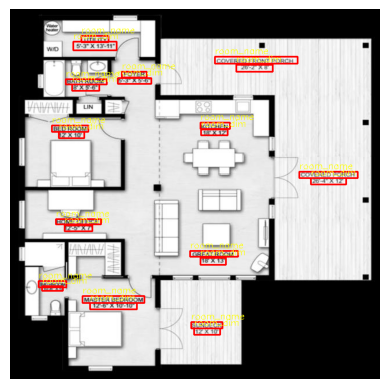

In [37]:
import cv2
import matplotlib.pyplot as plt

# Choose an image
img_info = data["images"][1]
img_path = "D:/mtech/Smartsense/assets/train/" + img_info["file_name"]

# Load image
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw all boxes for this image
for ann in data["annotations"]:
    if ann["image_id"] == img_info["id"]:
        x, y, w, h = ann["bbox"]
        cat = category_lookup[ann["category_id"]]
        cv2.rectangle(img, (int(x), int(y)), (int(x+w), int(y+h)), (255, 0, 0), 2)
        cv2.putText(img, cat, (int(x), int(y-5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,0), 1)

plt.imshow(img)
plt.axis('off')
plt.show()


In [38]:
pip install -r requirements.txt

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
python -m src.train_detector --annotations assets/train/annotations.coco.json --images_dir assets/train --epochs 50 --batch_size 8 --out_dir runs/detector

In [ ]:
python -m src.infer_to_json --ckpt runs/detector/detector_best.pth --images assets/train/55_24_jpg.rf.7d002da0b47571612e9b0d7269e725c4.jpg

In [ ]:
python -m src.infer_to_json --ckpt runs/detector/detector_best.pth --images assets/train/55_24_jpg.rf.7d002da0b47571612e9b0d7269e725c4.jpg

In [ ]:
python -m src.infer_to_json --ckpt runs/detector/detector_best.pth --images (Get-ChildItem assets\\train\\*.jpg | ForEach-Object { $_.FullName })